In [3]:
!rm -rf /content/Split_data

In [4]:
!unzip -q '/content/drive/MyDrive/custom model/Split_data.zip' -d /content/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [6]:
training_data_path =  '/content/Split_data/Train/Group_11'
validation_data_path = '/content/Split_data/Validation/Group_11'

In [7]:
os.listdir(training_data_path)

['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [8]:
os.listdir(validation_data_path)

['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [9]:
os.listdir(training_data_path+'/samosa')

['142.jpg',
 '216.jpg',
 '239.jpg',
 '096.jpg',
 '061.jpg',
 '192.jpg',
 '265.jpg',
 '007.jpg',
 '020.jpg',
 '162.jpg',
 '174.jpg',
 '262.jpg',
 '235.jpg',
 '134.jpg',
 '141.jpg',
 '125.jpg',
 '071.jpg',
 '116.jpg',
 '220.jpg',
 '132.jpg',
 '070.jpg',
 '210.jpg',
 '092.jpg',
 '048.jpg',
 '167.jpg',
 '111.jpg',
 '106.jpg',
 '084.jpg',
 '089.jpg',
 '077.jpg',
 '238.jpg',
 '056.jpg',
 '006.JPG',
 '264.jpg',
 '091.jpg',
 '104.jpg',
 '069.jpg',
 '115.jpg',
 '172.jpg',
 '012.jpg',
 'download (3).jpg',
 'images (15).jpg',
 '215.jpg',
 '126.jpg',
 'images (2).jpg',
 '085.jpg',
 '230.jpg',
 '153.jpg',
 '177.jpg',
 '027.jpg',
 '260.jpg',
 '023.jpg',
 '145.jpg',
 '103.jpg',
 'images (20).jpg',
 'images (7).jpg',
 '196.jpg',
 '074.jpg',
 '086.jpg',
 '164.jpg',
 '204.jpg',
 '095.jpg',
 '032.jpg',
 '225.jpg',
 'images (22).jpg',
 'download (4).jpg',
 '098.jpg',
 '261.jpg',
 '054.jpg',
 'images (5).jpg',
 '068.jpg',
 '194.jpg',
 '113.jpg',
 '043.jpg',
 '011.jpg',
 '076.jpg',
 '094.jpg',
 '258.jpg',
 

In [10]:
os.listdir(training_data_path+'/pizza')

['142.jpg',
 '021.jpg',
 '254.jpg',
 '216.jpg',
 '038.jpg',
 '239.jpg',
 '236.jpg',
 '105.jpg',
 '080.jpg',
 '143.jpg',
 '144.jpg',
 '007.jpg',
 '020.jpg',
 '087.jpg',
 '090.jpg',
 '120.jpg',
 '174.jpg',
 '003.jpg',
 '208.jpg',
 'images (9).jpg',
 '211.jpg',
 '152.jpg',
 '219.jpg',
 '079.jpg',
 'images.jpg',
 '197.jpg',
 '141.jpg',
 '071.jpg',
 '008.jpg',
 '178.jpg',
 '136.jpg',
 '116.jpg',
 '200.jpg',
 'download (7).jpg',
 '057.jpg',
 '053.jpg',
 '220.jpg',
 '070.jpg',
 '092.jpg',
 '048.jpg',
 '138.jpg',
 '022.jpg',
 '034.jpg',
 '209.jpg',
 '111.jpg',
 '106.jpg',
 '184.jpg',
 '077.jpg',
 '006.jpg',
 '251.jpg',
 '223.jpg',
 '104.jpg',
 '069.jpg',
 '040.jpg',
 '115.jpg',
 '067.jpg',
 '009.jpg',
 'download (3).jpg',
 '215.jpg',
 '028.jpg',
 '230.jpg',
 '153.jpg',
 '256.jpg',
 '177.jpg',
 '027.jpg',
 '188.jpg',
 '145.jpg',
 '030.jpg',
 '112.jpg',
 '041.jpg',
 '196.jpg',
 '086.jpg',
 '207.jpg',
 '095.jpg',
 '127.jpg',
 '195.jpg',
 'download (4).jpg',
 '198.jpg',
 '261.jpg',
 '194.jpg',
 '0

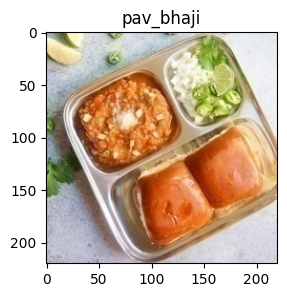

In [11]:
plt.figure(figsize=(5,3))
plt.title('pav_bhaji')
Baked_potato = plt.imread(training_data_path + '/pav_bhaji/002.jpg')
plt.imshow(Baked_potato)
plt.show()

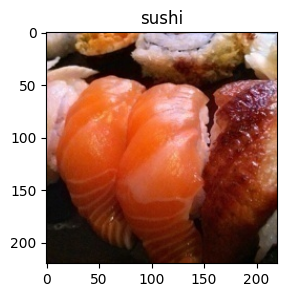

In [12]:
plt.figure(figsize=(5,3))
plt.title('sushi')
Donut = plt.imread(training_data_path + '/sushi/1049178.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
group11_path = os.path.join(training_data_path)
labels = sorted([name for name in os.listdir(group11_path)
                 if os.path.isdir(os.path.join(group11_path, name))])
print("Group_11 Classes:", labels)


Group_11 Classes: ['pav_bhaji', 'pizza', 'samosa', 'sushi']


In [15]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [16]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

Found 480 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid


In [18]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [19]:
num_classes = 4

model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(256,256,3)),
                     BatchNormalization(),
                     MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
                      Dropout(0.3),
    Dense(num_classes, activation='softmax')])

In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,872,004 (64.36 MB)

 Trainable params: 16,871,556 (64.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [22]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - accuracy: 0.4335 - loss: 4.0180 - val_accuracy: 0.2750 - val_loss: 1.4805
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.5881 - loss: 1.0198 - val_accuracy: 0.4875 - val_loss: 1.6740
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - accuracy: 0.6007 - loss: 0.9751 - val_accuracy: 0.4625 - val_loss: 2.1065
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - accuracy: 0.6383 - loss: 0.8510 - val_accuracy: 0.5125 - val_loss: 2.4396
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - accuracy: 0.6942 - loss: 0.7156 - val_accuracy: 0.5250 - val_loss: 2.1359
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.7055 - loss: 0.7843 - val_accuracy: 0.5188 - val_loss: 2.3410
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.7361 - loss: 0.6599 - val_accuracy: 0.4500 - val_loss: 2.4464
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - accuracy: 0.7492 - loss: 0.5653 - val_accura

**test_model**

In [23]:
import cv2

In [24]:
labels

['pav_bhaji', 'pizza', 'samosa', 'sushi']

In [25]:
train_input_data.class_indices

{'pav_bhaji': 0, 'pizza': 1, 'samosa': 2, 'sushi': 3}

In [26]:
def fun(path):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load and preprocess the image
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # Predict using the model
    pred = model.predict(input_image)

    # Mapping only for Group_1 (train_input_data created from Group_1 folder)
    mapping = train_input_data.class_indices  # Automatically has only 3 classes
    inv_map = {v: k for k, v in mapping.items()}

    # Get predicted class index and label
    predicted_index = np.argmax(pred)
    predicted_label = inv_map[predicted_index]

    # Print for debugging
    print("Group_1 class mapping:", mapping)
    print("Model raw output:", pred)
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}")

    # Display image with prediction
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Group_1 class mapping: {'pav_bhaji': 0, 'pizza': 1, 'samosa': 2, 'sushi': 3}
Model raw output: [[3.3412041e-05 9.9996638e-01 2.4488895e-07 2.5867226e-09]]
Predicted class index: 1
Predicted label: pizza


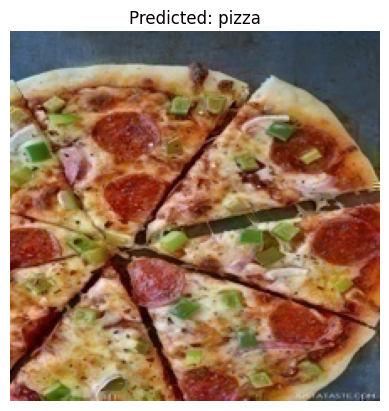

In [27]:
fun('/content/Split_data/Train/Group_11/pizza/002.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Group_1 class mapping: {'pav_bhaji': 0, 'pizza': 1, 'samosa': 2, 'sushi': 3}
Model raw output: [[1.3876407e-10 1.0555879e-08 7.5217160e-10 1.0000000e+00]]
Predicted class index: 3
Predicted label: sushi


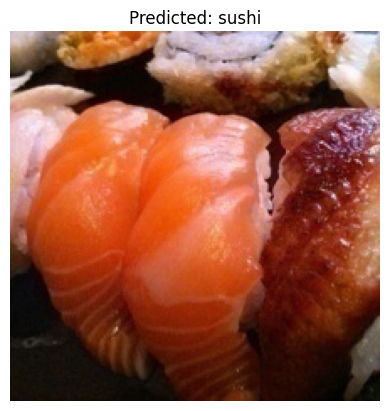

In [28]:
fun('/content/Split_data/Train/Group_11/sushi/1049178.jpg')

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [30]:
test_data_path = '/content/Split_data/Test/Group_11'

In [31]:
labels = ['pav_bhaji', 'pizza', 'samosa', 'sushi']


In [32]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 160 images belonging to 4 classes.


In [33]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [36]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))

Classification Report:

              precision    recall  f1-score   support

   pav_bhaji       0.62      0.72      0.67        40
       pizza       0.72      0.90      0.80        40
      samosa       0.89      0.62      0.74        40
       sushi       0.83      0.72      0.77        40

    accuracy                           0.74       160
   macro avg       0.76      0.74      0.74       160
weighted avg       0.76      0.74      0.74       160



In [37]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7438


In [38]:
model.save('/content/train_group11.h5')
print("Model saved successfully at /content/custom_food_model.h5")

Model saved successfully at /content/custom_food_model.h5


In [39]:
from tensorflow.keras.models import load_model
model = load_model('/content/train_group11.h5')
